# Task 26 - Natural Language Processing with spaCy
In this task, we develop a Python program that performs sentiment analysis
on a dataset of product reviews.

In [10]:
import pandas as pd
import re
import spacy  # import spacy
from textblob import TextBlob #import TextBlob
from sklearn.model_selection import train_test_split
import seaborn as sns

In [11]:
# load the data set and select the reviews column
df = pd.read_csv('amazon_product_reviews.csv',dtype='str')

# load the language model
nlp = spacy.load("en_core_web_md")

### Pre-processing

In [12]:
# select the column that contains the reviews and drop any missing values
review_data = df['reviews.text'].dropna()

# use string methods to switch to lower case and strip white space
review_data_cleaned = review_data.str.lower().str.strip()

In [13]:
# Function to clean doc in preparation for sentiment analysis.
def process_doc(doc):
    # lemmatize and filter out stop words
    temp_list = [token.lemma_ for token in doc if not token.is_stop]   
    # joins list to make string
    temp_str = ' '.join(temp_list)                                   
    # removes any non alpha numeric characters
    temp_str = re.sub('[^a-zA-Z0-9 \n]', '', temp_str)              
    return temp_str

# Function to return a doc with TextBlob sentiment attributes from the index of the review
def review_sentiment(review_index):
     doc = nlp(review_data_cleaned[review_index])
     doc = TextBlob(process_doc(doc))
     return doc

### Sentiment analysis

In [14]:
review_index = 1

polarity = review_sentiment(review_index).sentiment.polarity
subjectivity = review_sentiment(review_index).sentiment.subjectivity

print(f"The below review has a polarity of {polarity:.2f} and a subjectivity of {subjectivity:.2f}. \
       \n\n{review_data[review_index]}\n")

The below review has a polarity of 0.70 and a subjectivity of 0.75.        

great for beginner or experienced person. Bought as a gift and she loves it



### Similarity

In [15]:
# function to calculate the similarity between two reviews
def review_similarity(r1, r2):
    doc1 = nlp(review_data_cleaned[r1])    # review 1
    doc2 = nlp(review_data_cleaned[r2])    # review 2
    similarity_score = doc1.similarity(doc2)
    return similarity_score

r1 = review_index # index of review chosen by user
r2 = 0 # index of the review to compare similarity with

print(f"The similarity between review {r1} and {r2} is {review_similarity(r1,r2):.2f}")

The similarity between review 1 and 0 is 0.80


### Evaluation

In [16]:
# switch off warnings for this cell
import warnings
warnings.filterwarnings('ignore')

# take a random 10% test sample 
X_train, X_test = train_test_split(review_data_cleaned, test_size=0.05, random_state=42)

# convert the test sample to a dataframe
sentiment_df=X_test.to_frame()

# add a new column to the data frame and populate with the sentiment polarity score.
sentiment_df['polarity'] = ''
sentiment_df['rating'] = ''
for el in sentiment_df.index:
    sentiment_df['polarity'][el]=round(review_sentiment(el).sentiment.polarity,2)
    sentiment_df['rating'][el]=int(df['reviews.rating'][el])

sentiment_df = sentiment_df.sort_values(['polarity'], ascending=[False])

<Axes: xlabel='polarity', ylabel='rating'>

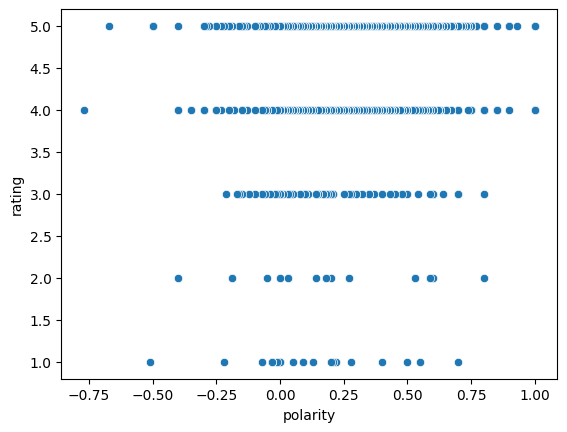

In [17]:
sns.scatterplot(data = sentiment_df, x= 'polarity', y='rating')

In [18]:
# Calculate some statistics for the report
print(sentiment_df['polarity'].mean())
print(sentiment_df['polarity'].median())
print(sentiment_df['polarity'].std())

0.3610675129832647
0.38
0.25998348355447626
